In [36]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [69]:
import pandas as pd
import numpy as np
import re
import nltk
import tensorflow.keras as keras
from nltk.corpus import stopwords
import tensorflow as tf

from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras import models, optimizers
from tensorflow.keras import layers
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding, LSTM
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
movie_reviews = pd.read_csv("IMDB Dataset.csv")

movie_reviews.isnull().values.any()

movie_reviews.shape

(50000, 2)

In [4]:
movie_reviews.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
movie_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

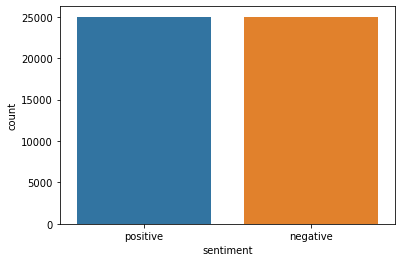

In [6]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews)

In [7]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence


In [8]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [9]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [10]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [11]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [86]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 256

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
dim = 300
glove_file = open('glove.840B.300d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    x = len(records) - dim
    vector_dimensions = asarray(records[x:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, dim, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(layers.Conv1D(filters=2, kernel_size=64, activation='relu'))
model.add(layers.Conv1D(filters=2, kernel_size=64, activation='relu'))
# model.add(layers.Conv1D(filters=2, kernel_size=64, activation='relu'))
# model.add(layers.Conv1D(filters=2, kernel_size=64, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1, validation_data=(X_test, y_test))

# score = model.evaluate(X_test, y_test, verbose=1)

In [82]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])


Test Score: 0.544224739074707
Test Accuracy: 0.7383999824523926


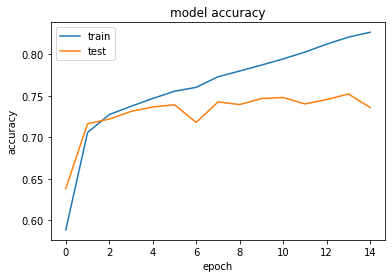

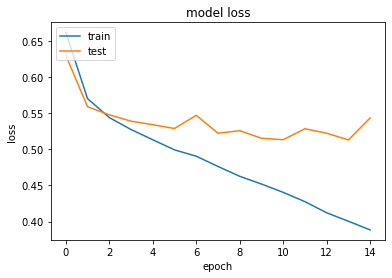

In [83]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [37]:
UNIQUE_WORD_COUNT = 10000
MAX_SEQUENCE_LENGTH = 100

In [ ]:
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=UNIQUE_WORD_COUNT)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Data preparing

# data = list(df.review)
# labels = list(df.sentiment)

tokenizer = Tokenizer(num_words=UNIQUE_WORD_COUNT) # Only 10000 most met words
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)

data = pad_sequences(sequences, maxlen=max_len) # Only 100 words in one review
labels = np.array(labels)


train_data = data[:40000]
train_labels = labels[:40000]

validation_data = data[40000:45000]
validation_labels = labels[40000:45000]

test_data = data[45000:]
test_labels = labels[45000:]

In [ ]:
def vectorize(sequences, dimension = UNIQUE_WORD_COUNT):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):      
        results[i, sequence] = 1
    return results

In [ ]:
data = vectorize(data)
targets = np.array(targets).astype("float32")
print(len(data))
test_x = data[:10000]
test_y = targets[:10000]
# valid_x = data[5000:10000]
# valid_y = targets[5000:10000]
train_x = data[10000:]
train_y = targets[10000:]

In [ ]:
print(len(train_x))
# print(len(valid_x))
print(len(test_x))

In [ ]:
dim = 100
GLOVE_DIR = 'glove.6B.100d.txt'

In [ ]:
embedding_index = {}
with open(GLOVE_DIR) as file: # Preparing glove
    for line in file:
        values = line.split()
        key = values[0]
        value = values[1:]
        embedding_index[key] = np.array(value, dtype='float32')
        
        
embedding_matrix = np.zeros((vocab, dim)) # 10000 - num_words, 100 - length of sequence
for word, i in tokenizer.word_index.items():
    if i < vocab:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
tokenizer.word_index.items()

In [38]:
def CNN():
    model = models.Sequential()
    # Input - Layer
#     model.add(layers.Dense(1000, activation = "relu", input_shape=(10000, )))
    # Hidden - Layers
    model.add(layers.Embedding(UNIQUE_WORD_COUNT, 50, input_length=UNIQUE_WORD_COUNT))
#     model.add(tensorflow.keras.Input(shape=(UNIQUE_WORD_COUNT, )))
#     model.add(embedding_layer)

    model.add(layers.Conv1D(filters=128, kernel_size=64, activation='relu'))
    model.add(layers.Conv1D(filters=128, kernel_size=64, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=4))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    print(model.summary())
    # compiling the model
    model.compile(
     optimizer = "adam",
     loss = "binary_crossentropy",
     metrics = ["accuracy"]
    )
    return model

In [39]:
model_CNN = CNN()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 10000, 50)         500000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 9937, 128)         409728    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 9874, 128)         1048704   
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2468, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 315904)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3159050   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [41]:
results_CNN_train = model_CNN.fit(
 X_train, y_train,
 epochs= 10,
 batch_size = 256,
 validation_data = (X_test, y_test)
)

Epoch 1/10


ValueError: in user code:

    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:531 train_step  **
        y_pred = self(x, training=True)
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:277 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/network.py:717 call
        return self._run_internal_graph(
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/layers/convolutional.py:207 call
        outputs = self._convolution_op(inputs, self.kernel)
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:1106 __call__
        return self.conv_op(inp, filter)
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:638 __call__
        return self.call(inp, filter)
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:231 __call__
        return self.conv_op(
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:220 _conv1d
        return conv1d(
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py:574 new_func
        return func(*args, **kwargs)
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py:574 new_func
        return func(*args, **kwargs)
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/nn_ops.py:1655 conv1d
        result = gen_nn_ops.conv2d(
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/gen_nn_ops.py:965 conv2d
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py:742 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/func_graph.py:593 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:3319 _create_op_internal
        ret = Operation(
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1816 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    /home/aseem/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1657 _create_c_op
        raise ValueError(str(e))

    ValueError: Negative dimension size caused by subtracting 64 from 37 for '{{node sequential_5/conv1d_3/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_5/conv1d_3/conv1d/ExpandDims, sequential_5/conv1d_3/conv1d/ExpandDims_1)' with input shapes: [?,1,37,128], [1,64,128,128].


In [ ]:
results_CNN_test = model_CNN.evaluate(test_x, test_y)